In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy import stats
import scipy.stats as stats
import os
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df = pd.read_csv('patient_dataset.csv')

In [3]:
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


In [4]:
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6000.000000,5528.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5391.000000,5386.000000,5432.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,53.657833,0.497648,2.518500,134.277167,209.844667,144.996000,0.503167,161.119644,59.964723,129.601252,29.941495,1.294623,0.501333,0.498167
std,21.018382,0.500040,1.124071,48.303001,52.840432,43.583318,0.500032,52.434693,23.264030,29.207479,11.626425,0.689932,0.500040,0.500038
min,18.000000,0.000000,1.000000,0.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.006670,0.100068,0.000000,0.000000
25%,36.000000,0.000000,2.000000,109.000000,164.000000,108.000000,0.000000,116.000000,40.000000,105.000000,19.797401,0.690522,0.000000,0.000000
50%,53.000000,0.000000,3.000000,135.000000,210.000000,144.000000,1.000000,162.000000,60.000000,129.000000,29.940303,1.294057,1.000000,0.000000
75%,72.000000,1.000000,4.000000,161.000000,257.000000,183.000000,1.000000,206.000000,80.000000,155.000000,39.859571,1.899079,1.000000,1.000000
max,90.000000,1.000000,4.000000,300.000000,300.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.999449,2.499635,1.000000,1.000000


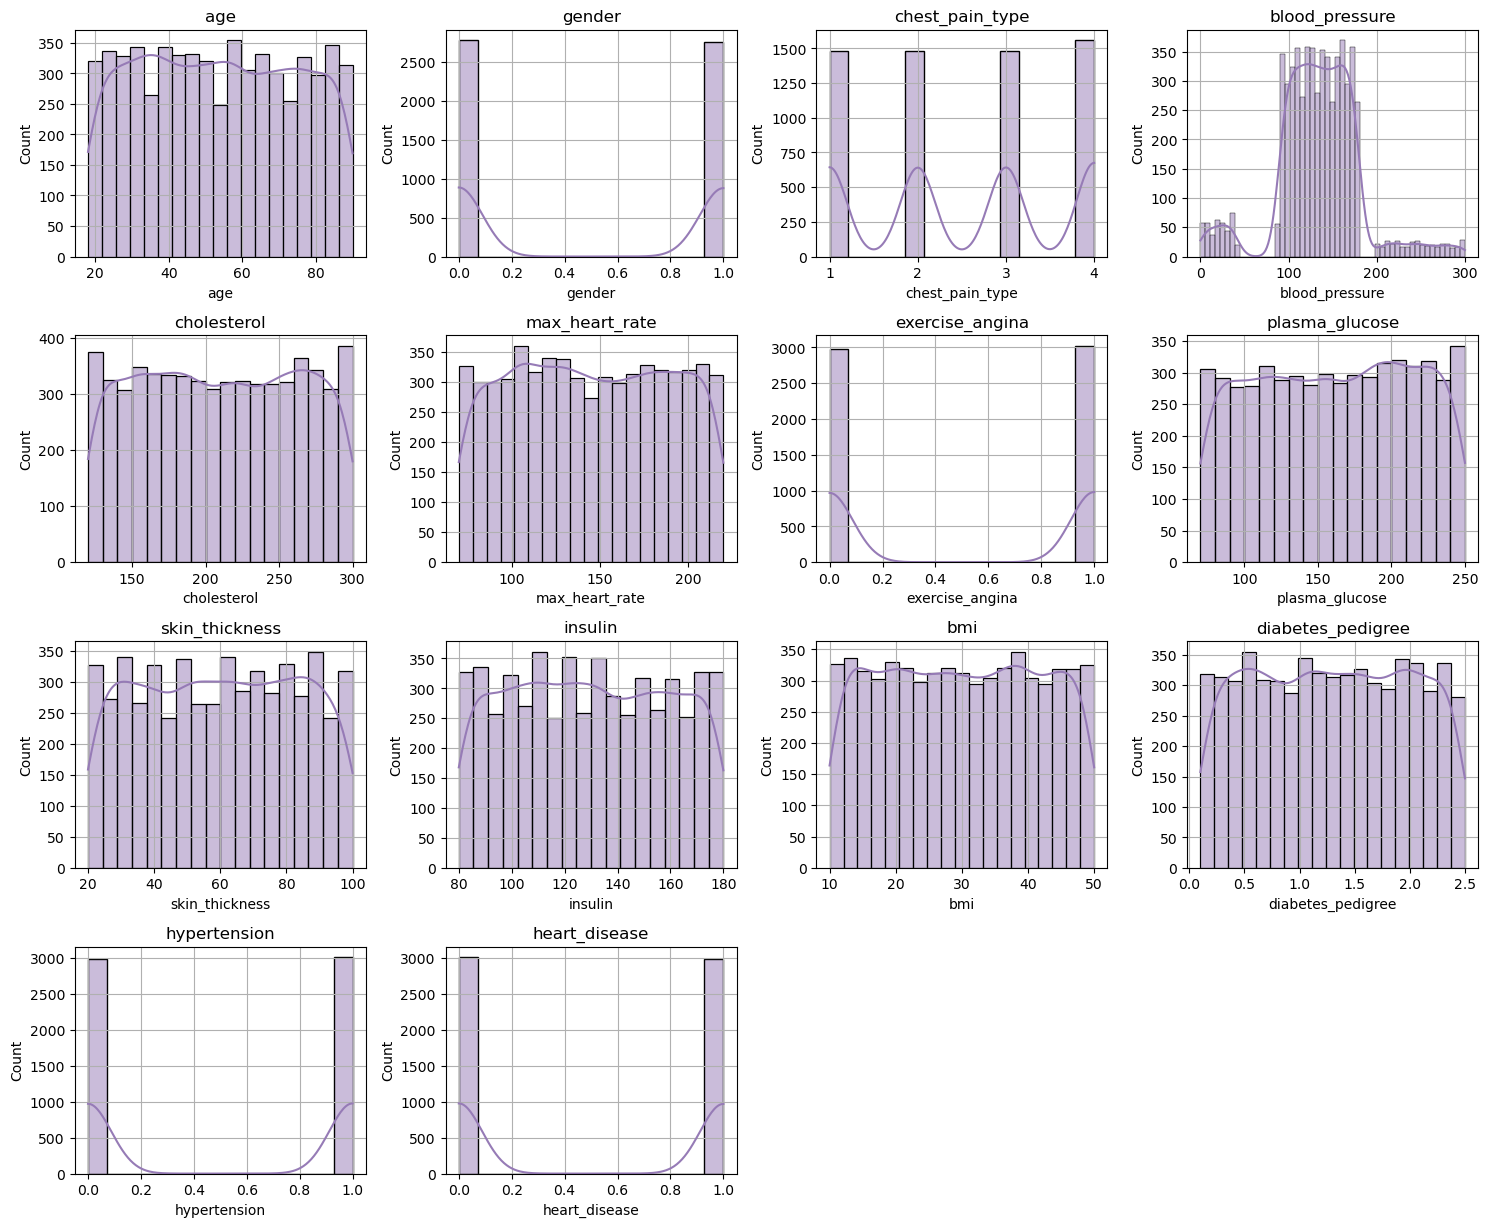

In [5]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

fig = plt.figure(figsize=(15, 15))

max_plots = 20

for index, column in enumerate(numeric_columns[:max_plots]):
    plt.subplot(5, 4, index + 1)
    
    sns.histplot(df[column].dropna(), color='#967bb6', kde=True)
    
    plt.title(column, size=12)
    plt.grid(True)

fig.tight_layout()
plt.show()

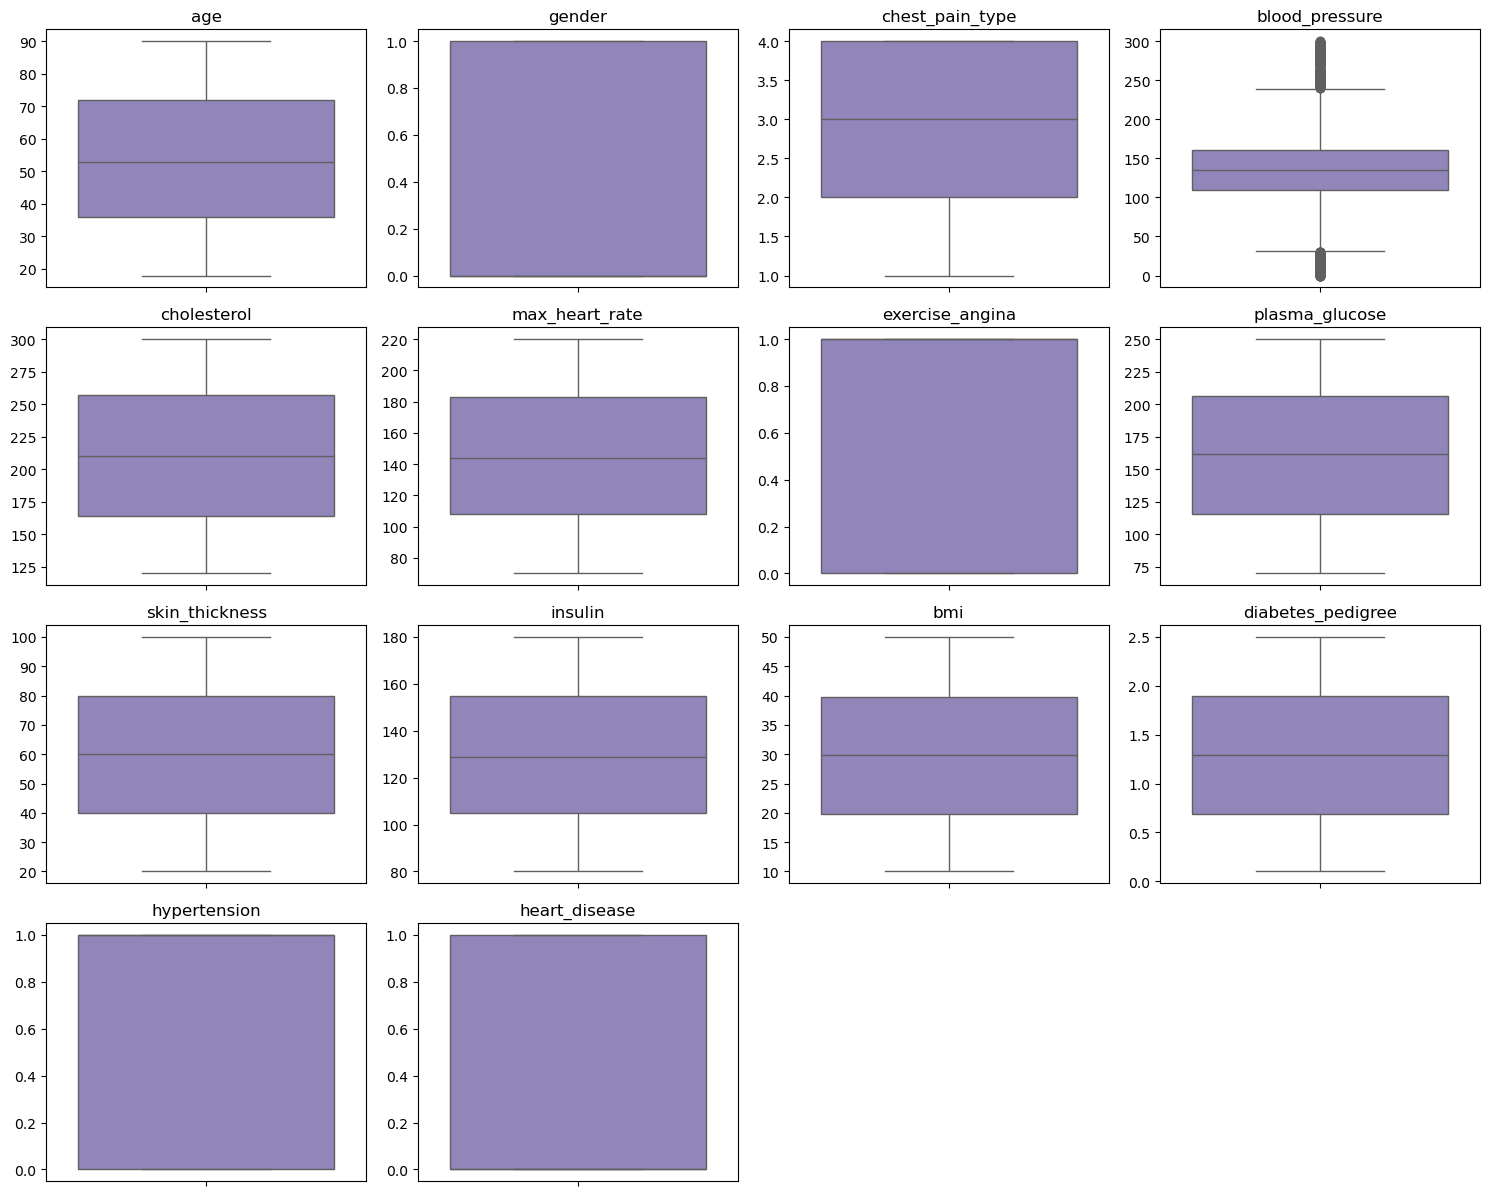

In [6]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

fig = plt.figure(figsize=(15, 15))

max_plots = 20

for index, column in enumerate(numeric_columns[:max_plots]):
    plt.subplot(5, 4, index + 1)
    
    sns.boxplot(y=df[column], color='#8e7cc3')
    
    plt.title(column, size=12)
    
    plt.xlabel('')
    plt.ylabel('')

fig.tight_layout()

plt.show()

In [7]:
df.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [8]:
df.dtypes

age                    int64
gender               float64
chest_pain_type        int64
blood_pressure         int64
cholesterol            int64
max_heart_rate         int64
exercise_angina        int64
plasma_glucose       float64
skin_thickness       float64
insulin              float64
bmi                  float64
diabetes_pedigree    float64
hypertension           int64
heart_disease          int64
residence_type        object
smoking_status        object
dtype: object

In [9]:
df = df.dropna(subset=['gender'])

df['plasma_glucose'] = df['plasma_glucose'].fillna(df['plasma_glucose'].median())
df['skin_thickness'] = df['skin_thickness'].fillna(df['skin_thickness'].median())
df['insulin'] = df['insulin'].fillna(df['insulin'].median())
df['residence_type'] = df['residence_type'].fillna(df['residence_type'].mode()[0])


In [10]:
le = LabelEncoder()
df['residence_type'] = le.fit_transform(df['residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [11]:
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,1,1
1,29,0.0,4,132,187,147,0,202.0,42.0,129.0,25.588346,0.283986,1,1,1,2
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,0,0
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,0,1
5,63,1.0,3,18,154,107,0,103.0,67.0,102.0,22.373849,1.062411,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,0,0
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,1,0
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,1,0
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,1,0


In [12]:
df.isnull().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

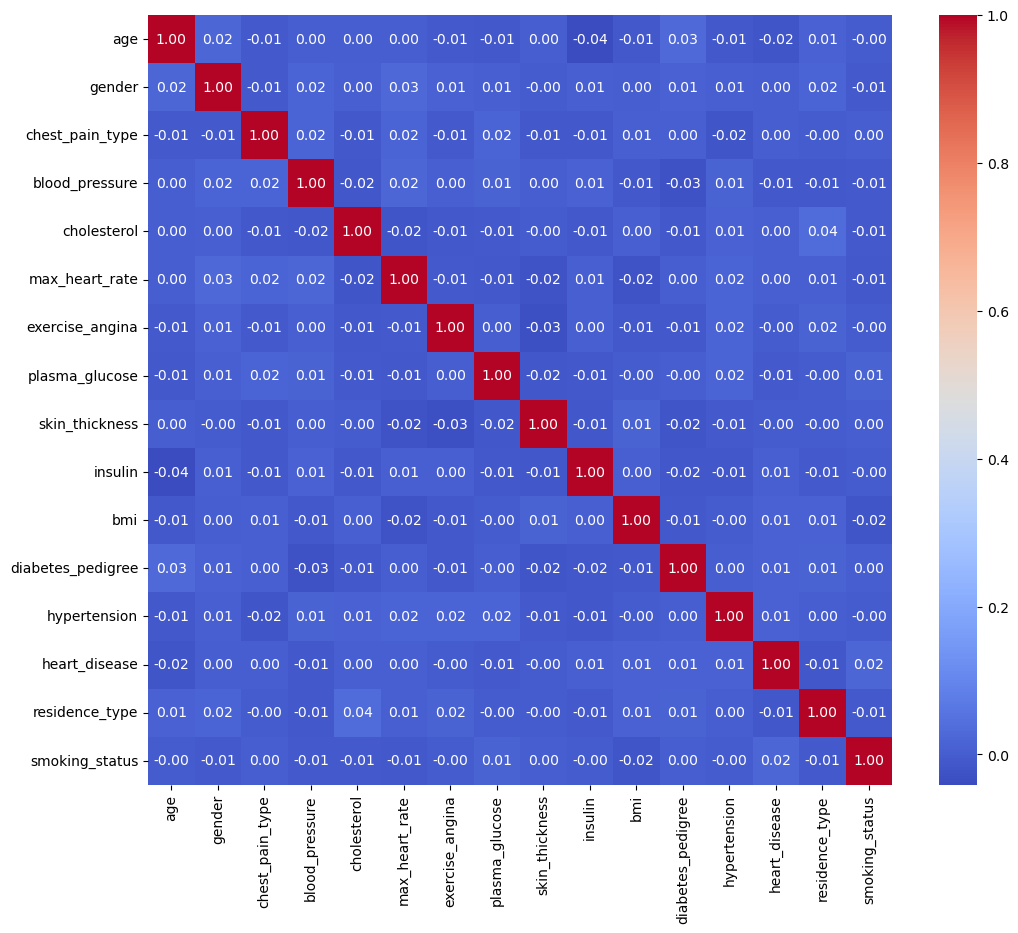

In [13]:
plt.figure(figsize=(12, 10)) 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.show()

In [14]:
attributes = list(df.columns.values)
chi_square_result = []  
for i in attributes:
    crosstab = pd.crosstab(df['residence_type'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    result = {"attribute": i, "chi2": chi2, "pvalue": p, "dof": dof}
    chi_square_result.append(result)
    
chi_square_df = pd.DataFrame(chi_square_result)
print(chi_square_df)

            attribute         chi2    pvalue   dof
0                 age    81.778880  0.201668    72
1              gender     1.474564  0.224627     1
2     chest_pain_type     0.225742  0.973330     3
3      blood_pressure   221.223579  0.649265   230
4         cholesterol   179.471398  0.497101   180
5      max_heart_rate   140.480112  0.699513   150
6     exercise_angina     1.205274  0.272270     1
7      plasma_glucose   181.085216  0.463266   180
8      skin_thickness    72.454505  0.713358    80
9             insulin   126.483445  0.037935   100
10                bmi  5528.000000  0.493676  5527
11  diabetes_pedigree  5528.000000  0.493676  5527
12       hypertension     0.005243  0.942274     1
13      heart_disease     1.038354  0.308205     1
14     residence_type  5523.976610  0.000000     1
15     smoking_status     0.314654  0.854425     2


In [15]:
columns_to_test = ['age', 'blood_pressure', 'max_heart_rate', 'plasma_glucose', 
                   'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'smoking_status']

for col in columns_to_test:
    corr, p_value = stats.pearsonr(df['residence_type'], df[col])
    print(f"Residence Type ve {col} arasındaki Pearson Korelasyonu: {corr:.3f}, p-değeri: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"Residence Type ve {col} arasında anlamlı bir ilişki bulunmaktadır.\n")
    else:
        print(f"Residence Type ve {col} arasında anlamlı bir ilişki bulunmamaktadır.\n")


Residence Type ve age arasındaki Pearson Korelasyonu: 0.010, p-değeri: 0.4642
Residence Type ve age arasında anlamlı bir ilişki bulunmamaktadır.

Residence Type ve blood_pressure arasındaki Pearson Korelasyonu: -0.013, p-değeri: 0.3495
Residence Type ve blood_pressure arasında anlamlı bir ilişki bulunmamaktadır.

Residence Type ve max_heart_rate arasındaki Pearson Korelasyonu: 0.005, p-değeri: 0.6886
Residence Type ve max_heart_rate arasında anlamlı bir ilişki bulunmamaktadır.

Residence Type ve plasma_glucose arasındaki Pearson Korelasyonu: -0.003, p-değeri: 0.8478
Residence Type ve plasma_glucose arasında anlamlı bir ilişki bulunmamaktadır.

Residence Type ve skin_thickness arasındaki Pearson Korelasyonu: -0.001, p-değeri: 0.9217
Residence Type ve skin_thickness arasında anlamlı bir ilişki bulunmamaktadır.

Residence Type ve insulin arasındaki Pearson Korelasyonu: -0.006, p-değeri: 0.6527
Residence Type ve insulin arasında anlamlı bir ilişki bulunmamaktadır.

Residence Type ve bmi ar

In [16]:
smoking_status_result = []  
for i in attributes:
    crosstab = pd.crosstab(df['smoking_status'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    result = {"attribute": i, "chi2": chi2, "pvalue": p, "dof": dof}
    smoking_status_result.append(result)

smoking_status_df = pd.DataFrame(smoking_status_result)

print("Smoking Status ile İlişkiler:")
print(smoking_status_df)

Smoking Status ile İlişkiler:
            attribute          chi2    pvalue    dof
0                 age    113.033638  0.973493    144
1              gender      0.986725  0.610570      2
2     chest_pain_type      1.967549  0.922659      6
3      blood_pressure    420.861109  0.904352    460
4         cholesterol    373.086702  0.306183    360
5      max_heart_rate    251.837408  0.980058    300
6     exercise_angina      0.810636  0.666765      2
7      plasma_glucose    395.961257  0.092976    360
8      skin_thickness    175.886498  0.184789    160
9             insulin    203.465026  0.418570    200
10                bmi  11056.000000  0.492846  11054
11  diabetes_pedigree  11056.000000  0.492846  11054
12       hypertension      0.910704  0.634225      2
13      heart_disease      2.338145  0.310655      2
14     residence_type      0.314654  0.854425      2
15     smoking_status  11056.000000  0.000000      4


In [17]:
df = df.drop(['residence_type'], axis=1)

In [18]:
df['gender'] = df['gender'].astype(int)

In [19]:
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,smoking_status
0,24,1,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,1
1,29,0,4,132,187,147,0,202.0,42.0,129.0,25.588346,0.283986,1,1,2
2,46,0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,0
4,49,1,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1
5,63,1,3,18,154,107,0,103.0,67.0,102.0,22.373849,1.062411,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,0
5996,51,1,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,0
5997,70,0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,0
5998,78,0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,0


In [20]:
df_std = df.copy()
cat_columns = ['age','chest_pain_type','gender','hypertension','heart_disease', 'smoking_status']

std_scaler = StandardScaler()
le = LabelEncoder()

for col in cat_columns:
    df_std[col] = le.fit_transform(df_std[col])

df_std = std_scaler.fit_transform(df_std)
df_std

array([[-1.41154842,  1.00471444,  1.31413132, ...,  0.99386829,
         1.00108597,  0.59932222],
       [-1.173958  , -0.99530768,  1.31413132, ...,  0.99386829,
         1.00108597,  2.19443693],
       [-0.36615057, -0.99530768,  0.42387177, ...,  0.99386829,
        -0.9989152 , -0.99579249],
       ...,
       [ 0.77428346, -0.99530768, -0.46638778, ..., -1.00616954,
         1.00108597, -0.99579249],
       [ 1.15442814, -0.99530768, -0.46638778, ...,  0.99386829,
        -0.9989152 , -0.99579249],
       [-1.22147608,  1.00471444,  1.31413132, ...,  0.99386829,
        -0.9989152 , -0.99579249]])

In [21]:
df_mm = df.copy()

mm_scaler = MinMaxScaler(feature_range=(-1,1))

for col in cat_columns:
    df_mm[col] = le.fit_transform(df_mm[col])

df_mm = mm_scaler.fit_transform(df_mm)
df_mm

array([[-0.83333333,  1.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.69444444, -1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.22222222, -1.        ,  0.33333333, ...,  1.        ,
        -1.        , -1.        ],
       ...,
       [ 0.44444444, -1.        , -0.33333333, ..., -1.        ,
         1.        , -1.        ],
       [ 0.66666667, -1.        , -0.33333333, ...,  1.        ,
        -1.        , -1.        ],
       [-0.72222222,  1.        ,  1.        , ...,  1.        ,
        -1.        , -1.        ]])

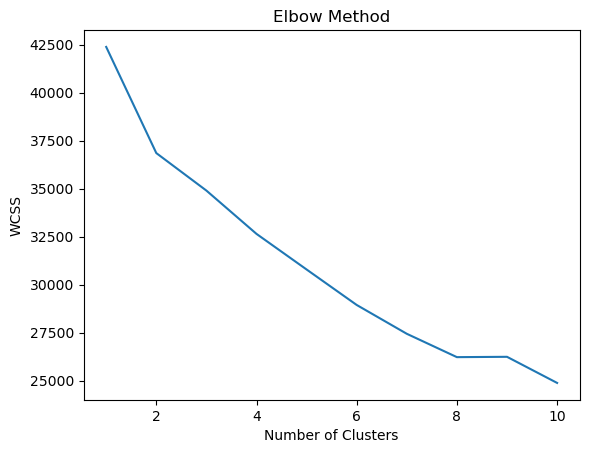

In [22]:
wcss = [] 

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=1)
    kmeans.fit(df_mm)
    wcss.append(kmeans.inertia_) 

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

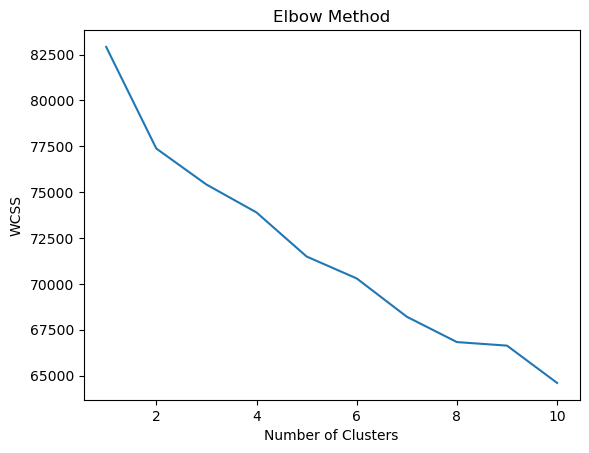

In [23]:
wcss_2 =[]
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=1)
    kmeans.fit(df_std)
    wcss_2.append(kmeans.inertia_) 

plt.plot(range(1, 11), wcss_2)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

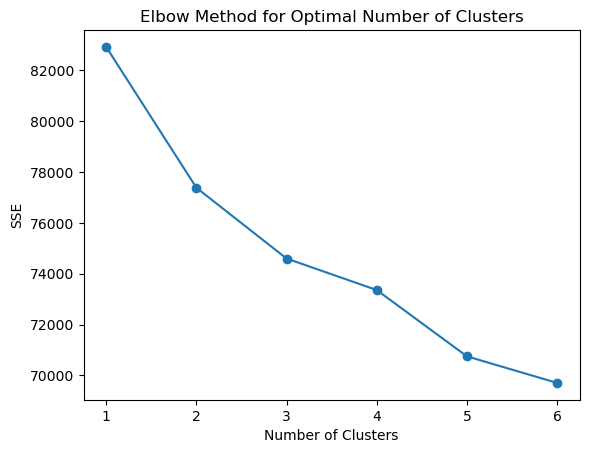

In [24]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Elbow Yöntemi ile SSE'yi hesaplıyoruz
numClusters = [1, 2, 3, 4, 5, 6]
SSE = []

for k in numClusters:
    k_means = KMeans(n_clusters=k)  
    k_means.fit(data_scaled)  
    SSE.append(k_means.inertia_) 

plt.plot(numClusters, SSE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [25]:
pca = PCA(n_components=2)
X_std = pca.fit_transform(df_std)
X_mm = pca.fit_transform(df_mm)

In [26]:
k = 3

kmeans_std = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=50).fit(X_std)

kmeans_mm = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=50).fit(X_mm)

In [27]:
labels_kmeans_std = kmeans_std.labels_

labels_kmeans_mm = kmeans_mm.labels_

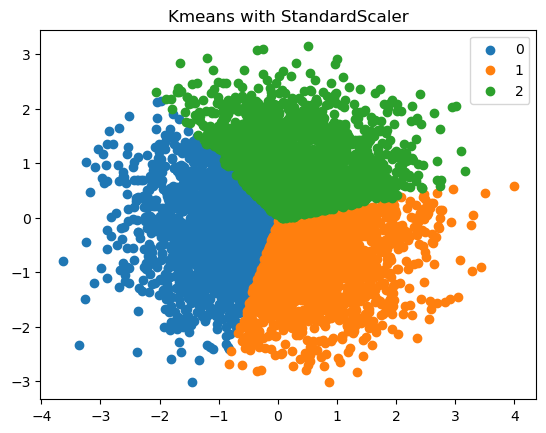

Inertia k-Means with StandardScaler: 5372.573980426285
Silhouette_score k-Means with StandardScaler: 0.329076347048843
Davies_bouldin_score k-Means with StandardScaler: 0.9404120549999789


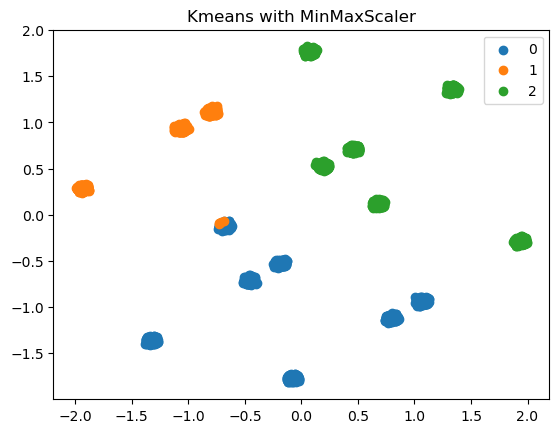

Inertia k-Means with MinMaxScaler: 4447.0437294425565
Silhouette_score k-Means with MinMaxScaler: 0.4385658142182969
Davies_bouldin_score k-Means with MinMaxScaler: 0.8561407807315202


In [28]:
u_labels = np.unique(labels_kmeans_std)

for i in u_labels:
    xy = X_std[labels_kmeans_std == i]
    plt.scatter(xy[:, 0], xy[:, 1], label=i)
plt.legend()
plt.title('Kmeans with StandardScaler')
plt.show()

print("Inertia k-Means with StandardScaler:", kmeans_std.inertia_)
print("Silhouette_score k-Means with StandardScaler:", silhouette_score(X_std, labels_kmeans_std))
print("Davies_bouldin_score k-Means with StandardScaler:", davies_bouldin_score(X_std, labels_kmeans_std))

u_labels = np.unique(labels_kmeans_mm)

for i in u_labels:
    plt.scatter(X_mm[labels_kmeans_mm == i, 0], X_mm[labels_kmeans_mm == i, 1], label=i)
plt.legend()
plt.title('Kmeans with MinMaxScaler')
plt.show()

print("Inertia k-Means with MinMaxScaler:", kmeans_mm.inertia_)
print("Silhouette_score k-Means with MinMaxScaler:", silhouette_score(X_mm, labels_kmeans_mm))
print("Davies_bouldin_score k-Means with MinMaxScaler:", davies_bouldin_score(X_mm, labels_kmeans_mm))

In [29]:
df_cleaning = df.copy()

In [30]:
df_cleaning = df_cleaning.drop(['gender'], axis=1)
df_cleaning = df_cleaning.drop(['smoking_status'], axis=1)
df_cleaning = df_cleaning.drop(['bmi'], axis=1)
df_cleaning = df_cleaning.drop(['skin_thickness'], axis=1)

In [31]:
df_cleaning

,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,insulin,diabetes_pedigree,hypertension,heart_disease
0,24,4,250,139,212,0,108.0,109.0,0.480277,1,1
1,29,4,132,187,147,0,202.0,129.0,0.283986,1,1
2,46,3,271,185,193,0,149.0,102.0,2.472309,1,0
4,49,3,91,163,192,0,162.0,170.0,0.537627,1,1
5,63,3,18,154,107,0,103.0,102.0,1.062411,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1,117,247,88,1,104.0,179.0,2.017600,1,0
5996,51,2,173,297,81,0,208.0,82.0,1.276717,0,1
5997,70,2,120,234,111,0,139.0,86.0,0.646022,0,1
5998,78,2,131,189,133,1,196.0,150.0,0.719095,1,0


In [32]:
df_std2 = df_cleaning.copy()
cat_columns = ['age', 'chest_pain_type', 'hypertension', 'heart_disease']

std_scaler = StandardScaler()
le = LabelEncoder()

for col in cat_columns:
    df_std2[col] = le.fit_transform(df_std2[col])

df_std2 = std_scaler.fit_transform(df_std2)
df_std2

array([[-1.41154842,  1.31413132,  2.40171652, ..., -1.18191317,
         0.99386829,  1.00108597],
       [-1.173958  ,  1.31413132, -0.05105555, ..., -1.46680586,
         0.99386829,  1.00108597],
       [-0.36615057,  0.42387177,  2.83822681, ...,  1.70927799,
         0.99386829, -0.9989152 ],
       ...,
       [ 0.77428346, -0.46638778, -0.30049   , ..., -0.94135517,
        -1.00616954,  1.00108597],
       [ 1.15442814, -0.46638778, -0.07184175, ..., -0.83529789,
         0.99386829, -0.9989152 ],
       [-1.22147608,  1.31413132,  0.07366167, ...,  0.35395173,
         0.99386829, -0.9989152 ]])

In [33]:
pca2 = PCA()
X_std2 = pca2.fit_transform(df_std2)

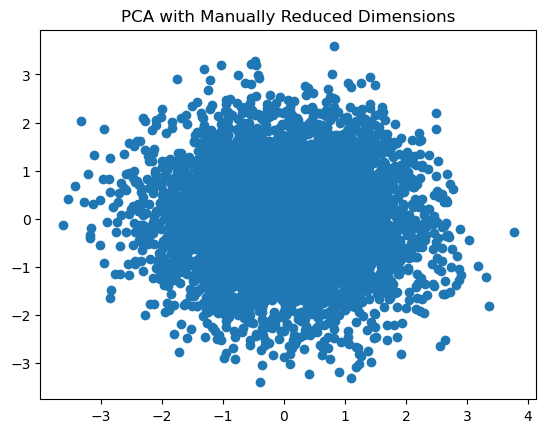

In [34]:
plt.scatter(X_std2[: , 0] ,X_std2[: , 1])
plt.title('PCA with Manually Reduced Dimensions')
plt.show()

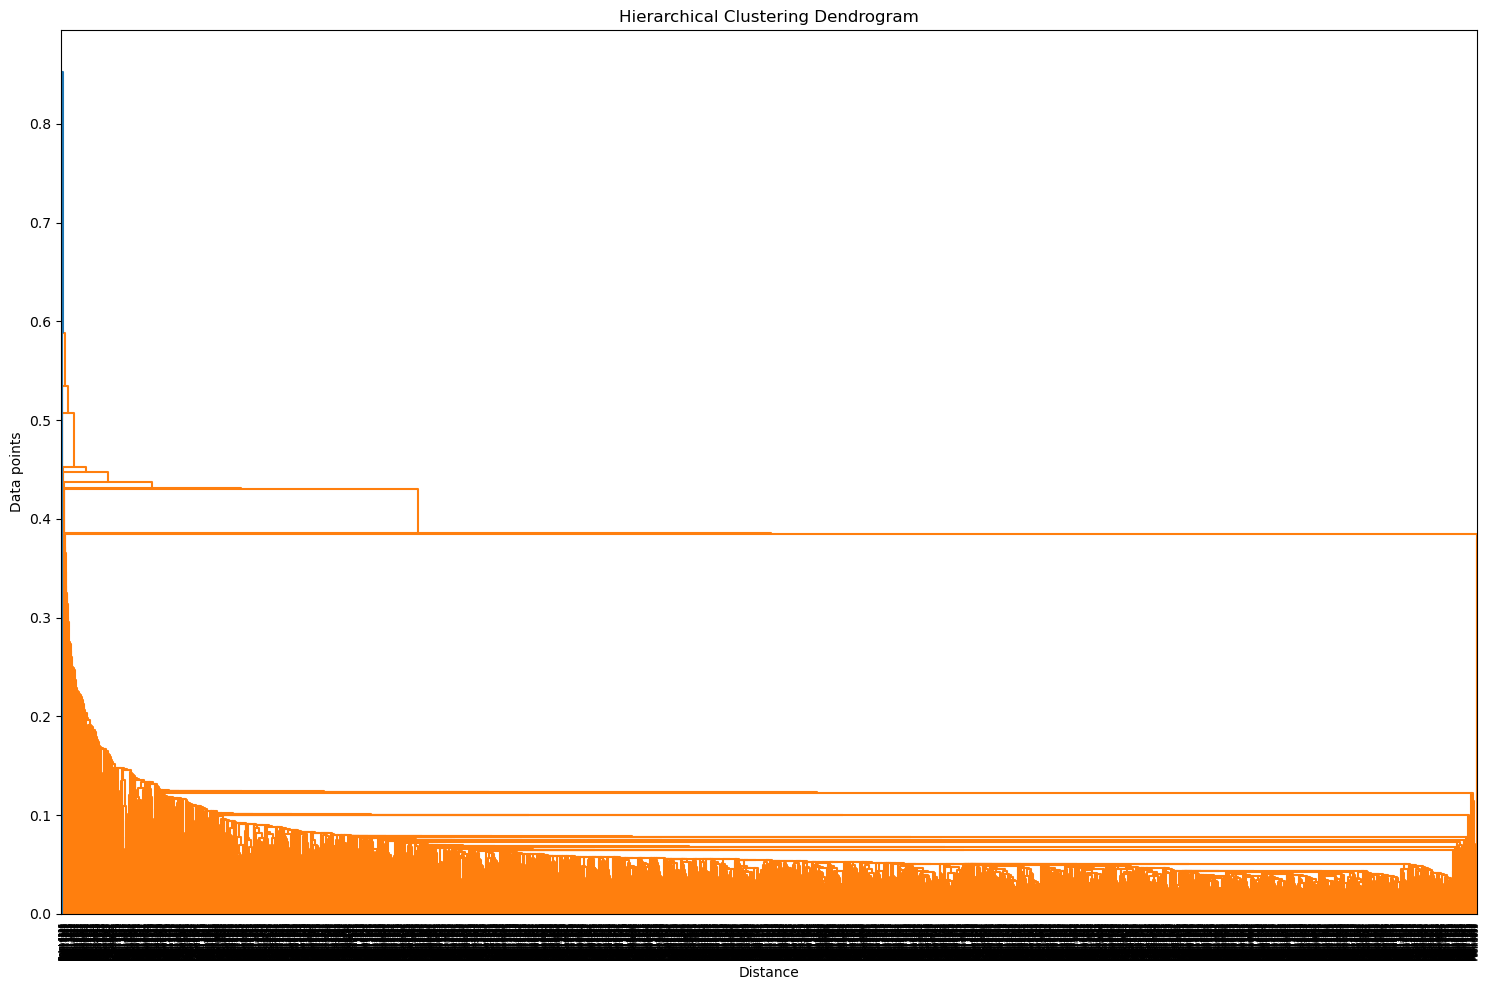

In [35]:
import scipy.cluster.hierarchy as hierarchy

X = X_std  

names = [f'Point {i}' for i in range(len(X))]

Z = hierarchy.linkage(X, 'single')

plt.figure(figsize=(15, 10))  
dn = hierarchy.dendrogram(Z, labels=names, orientation='top') 


plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Data points')


plt.tight_layout()  
plt.show()


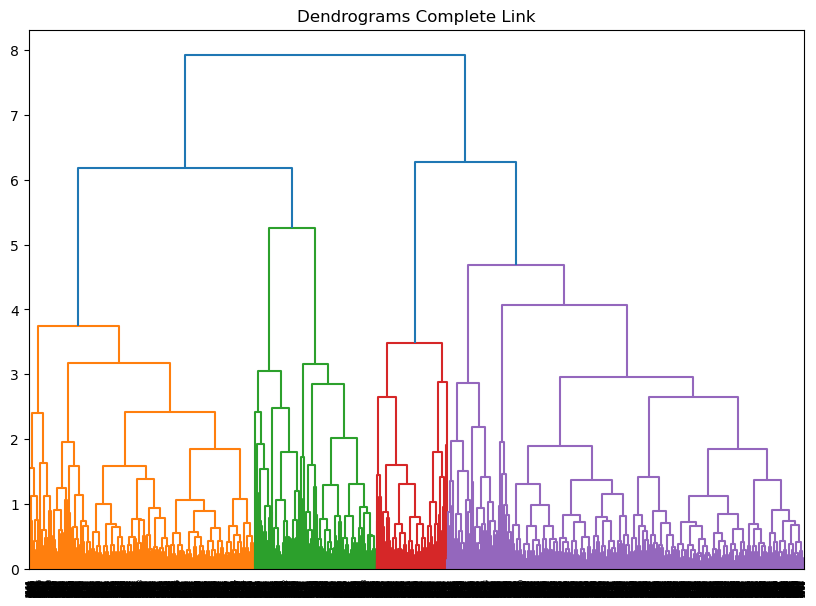

In [36]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Complete Link")  
dend = shc.dendrogram(shc.linkage(X_std, method='complete'))

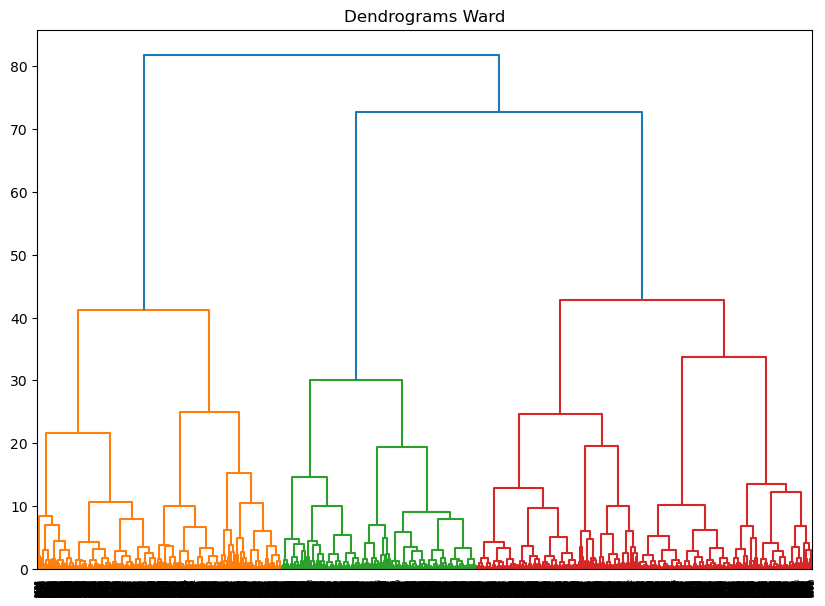

In [37]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Ward")  
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))